In [36]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml
import numpy as np
from itertools import combinations, groupby
from collections import Counter

df = pd.read_csv("grocery_store_data_cleaned.csv")
df.head(8)

/Users/garyvartanian/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,TICKET,UNITS,Dummy Non Integer,REFERENCE,CODE,NAME,UNIT_PRICEBUY,UNIT_PRICESELL,99 promotion,DATE,...,Year,Time,PAYMENT,TRANSID,CATEGORY,TOTAL_PRICEBUY,TOTAL_PRICESELL,UNIT_PRICE_MARGIN,PROFIT,Profit Margin
0,8e1e8d7c-9247-44bc-b50e-dd01acb68974,0.382,1,1063,1.063000e+03,Onion brown,0.00,1.99,1,10/13/19 17:43,...,19,17:43,cash,no ID,Onions,0.00,0.76018,1.99,0.76018,1
1,8e1e8d7c-9247-44bc-b50e-dd01acb68974,2.000,0,5000,9.330000e+12,Eggs 700g,2.70,3.20,0,10/13/19 17:43,...,19,17:43,cash,no ID,Eggs,5.40,6.40000,0.50,1.00000,0.15625
2,5cb041e2-1976-45b4-ba06-7779d6893156,1.000,0,9002,8.000000e+12,Diced Tomatoes,0.68,0.99,1,10/13/19 17:41,...,19,17:41,magcard,9.04E+11,Pastas,0.68,0.99000,0.31,0.31000,0.313131
3,5cb041e2-1976-45b4-ba06-7779d6893156,1.524,1,1064,1.064000e+03,Onion red,0.00,2.99,1,10/13/19 17:41,...,19,17:41,magcard,9.04E+11,Onions,0.00,4.55676,2.99,4.55676,1
4,5cb041e2-1976-45b4-ba06-7779d6893156,1.000,0,1141,1.141000e+03,Pac choy,0.50,0.90,0,10/13/19 17:41,...,19,17:41,magcard,9.04E+11,Asian Vegies,0.50,0.90000,0.40,0.40000,0.444444
5,5cb041e2-1976-45b4-ba06-7779d6893156,0.754,1,1081,1.081000e+03,Radish white,0.00,2.99,1,10/13/19 17:41,...,19,17:41,magcard,9.04E+11,Asian Vegies,0.00,2.25446,2.99,2.25446,1
6,5cb041e2-1976-45b4-ba06-7779d6893156,0.552,1,1008,1.008000e+03,Broccoli,0.00,3.50,0,10/13/19 17:41,...,19,17:41,magcard,9.04E+11,Other Vegies,0.00,1.93200,3.50,1.93200,1
7,5cb041e2-1976-45b4-ba06-7779d6893156,1.000,0,1120,9.330000e+12,Baby Cos 2pac,2.00,2.90,0,10/13/19 17:41,...,19,17:41,magcard,9.04E+11,Lettuces,2.00,2.90000,0.90,0.90000,0.310345


In [7]:
df.describe()

,UNITS,Dummy Non Integer,REFERENCE,CODE,UNIT_PRICEBUY,UNIT_PRICESELL,99 promotion,Month,Day,Year,TOTAL_PRICEBUY,TOTAL_PRICESELL,UNIT_PRICE_MARGIN,PROFIT
count,659221.000000,659221.000000,659221.000000,6.592210e+05,659221.000000,659221.000000,659221.000000,659221.000000,659221.000000,659221.000000,659221.000000,659221.000000,659221.000000,659221.000000
mean,0.904336,0.640231,2133.543411,3.834236e+13,1.115888,3.972506,0.515869,6.432383,15.643149,17.422350,0.999700,2.886620,2.856619,1.886921
std,0.754793,0.479933,1913.365823,8.438120e+14,1.981139,3.093692,0.499748,3.333835,8.757265,1.053604,1.841089,2.602238,3.105991,2.137957
min,-1.000000,0.000000,1001.000000,1.001000e+03,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000,-2.000000,-2.990000,-20.000000,-22.837500
25%,0.454000,0.000000,1067.000000,1.067000e+03,0.000000,2.000000,0.000000,4.000000,8.000000,17.000000,0.000000,1.500000,0.990000,0.700000
50%,1.000000,1.000000,1205.000000,1.256000e+03,0.000000,2.990000,1.000000,6.000000,16.000000,17.000000,0.000000,2.315360,2.000000,1.420440
75%,1.000000,1.000000,2059.000000,2.070000e+03,2.000000,4.900000,1.000000,9.000000,23.000000,18.000000,1.576000,3.500000,3.500000,2.500000
max,48.000000,1.000000,9998.000000,9.190000e+16,45.000000,53.000000,1.000000,12.000000,31.000000,19.000000,138.000000,230.000000,25.000000,215.000000


In [11]:
print(df.columns)


Index(['TICKET', 'UNITS', 'Dummy Non Integer', 'REFERENCE', 'CODE', 'NAME',
       'UNIT_PRICEBUY', 'UNIT_PRICESELL', '99 promotion', 'DATE', 'MDY',
       'Month', 'Day', 'Year', 'Time', 'PAYMENT', 'TRANSID', 'CATEGORY',
       'TOTAL_PRICEBUY', 'TOTAL_PRICESELL', 'UNIT_PRICE_MARGIN', 'PROFIT',
       'Profit Margin'],
      dtype='object')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

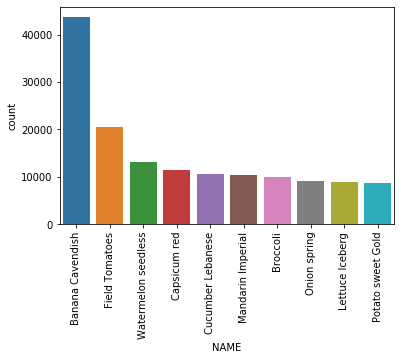

In [12]:
sns.countplot(x = 'NAME', data = df, order = df['NAME'].value_counts().iloc[:10].index)/
plt.xticks(rotation=90)
# Best Selling Items

# Basket Analysis with Banana

In [45]:
df2 = df.groupby(['TICKET','NAME']).size().reset_index(name='count')
basket = (df2.groupby(['TICKET','NAME'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('TICKET'))
#The encoding function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules2 = association_rules(frequent_itemsets, metric="lift")
rules2.sort_values('confidence', ascending = False, inplace = True)
rules2.head(60)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
43,(Pear Packham),(Banana Cavendish),0.041117,0.237550,0.018926,0.460305,1.937716,0.009159,1.412741
3,(Apples Pink Lady),(Banana Cavendish),0.044546,0.237550,0.019921,0.447200,1.882548,0.009339,1.379250
9,(Berries Strawberry (medium)),(Banana Cavendish),0.023619,0.237550,0.010315,0.436715,1.838411,0.004704,1.353577
4,(Apples Royal Gala),(Banana Cavendish),0.029461,0.237550,0.012513,0.424734,1.787977,0.005515,1.325387
31,(Mandarin Imperial),(Banana Cavendish),0.056289,0.237550,0.022592,0.401347,1.689526,0.009220,1.273610
34,(Nectarine White),(Banana Cavendish),0.031252,0.237550,0.011260,0.360295,1.516713,0.003836,1.191878
1,(Apples Granny Smith),(Banana Cavendish),0.027807,0.237550,0.010013,0.360079,1.515802,0.003407,1.191475
41,(Orange navel),(Banana Cavendish),0.034401,0.237550,0.012376,0.359744,1.514394,0.004204,1.190852
11,(Broccoli),(Banana Cavendish),0.053932,0.237550,0.019119,0.354494,1.492289,0.006307,1.181165
17,(Carrots 1kg),(Banana Cavendish),0.037567,0.237550,0.013255,0.352838,1.485320,0.004331,1.178144


Support - this means the probability of a transaction containing the item

Confidence - this is the probability that someone who bought antecedent buy the consequent

Lift - this shows the times more likely to buy then compared to random chance

# Basket Analysis without the Banana

In [30]:
df2 = df[df['NAME'] != 'Banana Cavendish'].groupby(['TICKET','NAME']).size().reset_index(name='count')
basket = (df2.groupby(['TICKET','NAME'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('TICKET'))
#The encoding function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules3 = association_rules(frequent_itemsets, metric="lift")
rules3.sort_values('confidence', ascending = False, inplace = True)


In [31]:
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Capsicum green),(Capsicum red),0.031123,0.064660,0.010373,0.333273,5.154222,0.008360,1.402882
10,(Cucumber continental),(Field Tomatoes),0.046657,0.114982,0.010582,0.226809,1.972559,0.005217,1.144630
8,(Cucumber Lebanese),(Field Tomatoes),0.059545,0.114982,0.013301,0.223385,1.942779,0.006455,1.139584
6,(Zucchini green),(Capsicum red),0.048640,0.064660,0.010616,0.218262,3.375531,0.007471,1.196488
0,(Broccoli),(Field Tomatoes),0.055596,0.114982,0.011030,0.198390,1.725398,0.004637,1.104050
5,(Capsicum red),(Field Tomatoes),0.064660,0.114982,0.011596,0.179341,1.559730,0.004161,1.078424
7,(Capsicum red),(Zucchini green),0.064660,0.048640,0.010616,0.164184,3.375531,0.007471,1.138242
2,(Capsicum red),(Capsicum green),0.064660,0.031123,0.010373,0.160417,5.154222,0.008360,1.153997
9,(Field Tomatoes),(Cucumber Lebanese),0.114982,0.059545,0.013301,0.115682,1.942779,0.006455,1.063481
4,(Field Tomatoes),(Capsicum red),0.114982,0.064660,0.011596,0.100852,1.559730,0.004161,1.040252
